In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

# Principal Component Analysis
from sklearn.decomposition import PCA

In [13]:
def load_data(path:str, as_df=True):
    """Given the path of the directory containing the data, 
    the respective mat_file and M_curves data is loaded"""
    mat_file = "echo_params.txt"
    M_file_r = "echos_r" # real part of echos
    M_file_i = "echos_i" # imaginary part of echos

    mat_info = np.loadtxt(os.path.join(path,mat_file));

    # M(t) curve for each simulation:
    M_r = np.loadtxt(os.path.join(path,M_file_r));
    M_i = np.loadtxt(os.path.join(path,M_file_i));
    print("Finished loading data into numpy array")
    return np.abs(M_r + 1j*M_i)

def load_params(path:str):
    """Given the directory path loads the input parameter files for the simualtions"""
    params = np.loadtxt(os.path.join(path,"echo_params.txt"))
    cols = 'αx αy αz ξ p Γ3 stencil_type s p d pulse90 pulse180'.split()
    print("Finsihed laoding parameters file")
    return pd.DataFrame(params,columns=cols)

def get_window(data:np.ndarray, center_ratio:float, width:float):
    """Returns a subset of the given array with only those datapoints between 
    [center - width , center + width] for all rows/examples"""
    start = int((center_ratio)*data.shape[1])
    return data[:,start-width:start+width], start

def standard_scale(data:np.ndarray):
    """Standardizing the given array with mean=0 and variance=1 column-wise"""
    mean,std = np.mean(data,axis=0), np.std(data,axis=0)
    return (data-mean)/std

def normalize(data:np.ndarray):
    """Normalizing the data so that all values are within the new range of 0 and 1"""
    return (data - np.min(data,axis=0))/(np.max(data,axis=0) - np.min(data,axis=0))

def pca2D(data:np.ndarray):
    """Returns a 2D PCA version of the given dataset. 
    The given dataset (input) should already be normalised. 
    Returns: 
        Dim-reduced 2D data, variance explained by the two dimensions"""
    pca2D = PCA(n_components=2)
    pca2D_data = pca2D.fit_transform(data)
    variance = pca2D.explained_variance_ratio_
    principal_data = pd.DataFrame(data = pca2D_data, columns = ['PC1', 'PC2'])
    return principal_data, variance

def pca3D(data:np.ndarray):
    """Returns a 3D PCA version of the given dataset. 
    The given dataset (input) should already be normalised. 
    Returns: 
        Dim-reduced 3D data, variance explained by the two dimensions"""
    pca2D = PCA(n_components=3)
    pca2D_data = pca2D.fit_transform(data)
    variance = pca2D.explained_variance_ratio_
    principal_data = pd.DataFrame(data = pca2D_data, columns = ['PC1', 'PC2','PC3'])
    return principal_data, variance


def get_random_points(start,end,no_points):
    """Generates 'no_points' random points between (start, end)"""
    data = np.arange(start,end,1)
    np.random.shuffle(data)
    return data[:no_points]



In [4]:
path = '/content/drive/MyDrive/GSOC-NMR-project/Work/Data/2021-06-10_oscar_spinechosim_cuda/'

M = load_data(path,False)
M, center = get_window(M,2/3,200)

Finished loading data into numpy array


In [7]:
# Normalise the Data
norm_data = normalize(M) # normalizing the features

## Implementing tSNE

t-distributed Stochastic Neighbor Embedding is a nonlinear dimensionality reduction technique that is well suited for embedding high dimension data into lower dimensional data (2D or 3D) for data visualization.

In [5]:
from sklearn.manifold import TSNE

### t-SNE with 1000 data points

In [44]:
n = get_random_points(start=0,end=len(norm_data),no_points=1000)
M_reduced = M[n,:]

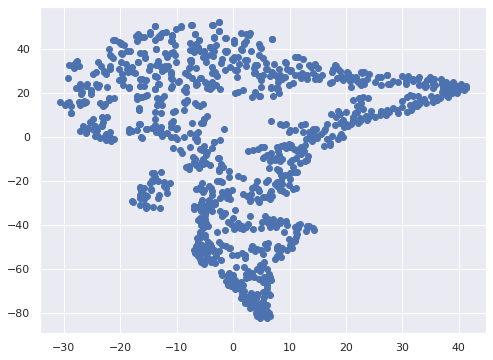

In [22]:
# Perplexity = 30
model = TSNE(n_components=2,perplexity=30,n_iter=5000,learning_rate=10,random_state=0)
tsne_data = model.fit_transform(M_reduced)

# Done using 5000 training samples ; 
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(tsne_data[:,0],tsne_data[:,1])
plt.show()

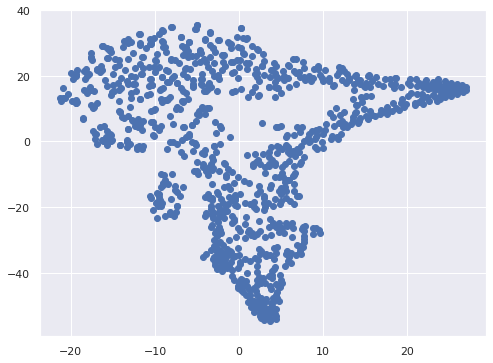

In [23]:
# Perplexity = 50 
model = TSNE(n_components=2,perplexity=50,n_iter=5000,learning_rate=10,random_state=0)
tsne_data = model.fit_transform(M_reduced)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(tsne_data[:,0],tsne_data[:,1])
plt.show()

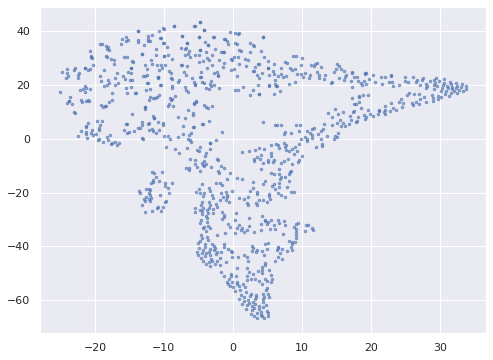

In [29]:
# Perplexity = 40, interations = 10k
model = TSNE(n_components=2,perplexity=40,n_iter=10000,learning_rate=10,random_state=0)
tsne_data = model.fit_transform(M_reduced)

# changed perplexity to 40 and iterations to 10k, however the plot seems to not change

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(tsne_data[:,0],tsne_data[:,1], 'b.', markersize=5,alpha=0.6)
plt.show()

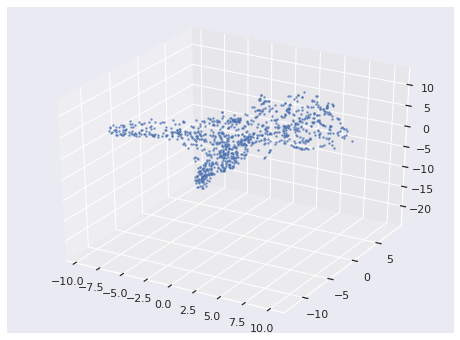

In [32]:
# 3D tSNE
# Need to try this locally to view the 3D box

model3d = TSNE(n_components=3,perplexity=50,n_iter=6000,random_state=0)
tsne_data3d = model3d.fit_transform(M_reduced)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(tsne_data3d[:,0],tsne_data3d[:,1],tsne_data3d[:,2], 'b.', markersize=3,alpha=0.6)
plt.show()

### tSNE for 500 points

In [33]:
m = get_random_points(start=0,end=len(norm_data),no_points=500)
M_reduced2 = M[m,:]

In [46]:
# Perplexity = 100, interations = 10k
model_500p = TSNE(n_components=2,perplexity=100,n_iter=1000,learning_rate=5,random_state=0)
tsne_data_500p = model_500p.fit_transform(M_reduced2)

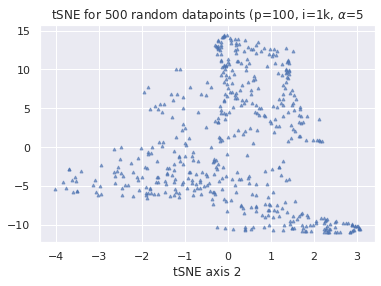

In [51]:
plt.plot(tsne_data_500p[:,0],tsne_data_500p[:,1], 'b^', markersize=3,alpha=0.6)
plt.xlabel('tSNE axis 1')
plt.xlabel('tSNE axis 2')
plt.title(r'tSNE for 500 random datapoints (p=100, i=1k, $\alpha$=5)')
plt.show()

In [54]:
# Perplexity = 20, interations = 10k
model_500p_2 = TSNE(n_components=2,perplexity=50,n_iter=1000,learning_rate=10,random_state=0)
tsne_data_500p_2 = model_500p_2.fit_transform(M_reduced2)

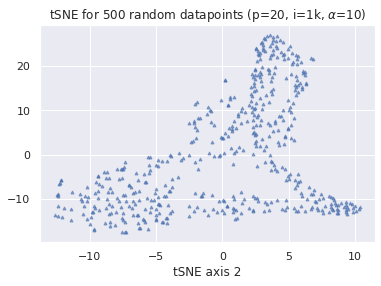

In [55]:
plt.plot(tsne_data_500p_2[:,0],tsne_data_500p_2[:,1], 'b^', markersize=3,alpha=0.6)
plt.xlabel('tSNE axis 1')
plt.xlabel('tSNE axis 2')
plt.title(r'tSNE for 500 random datapoints (p=20, i=1k, $\alpha$=10)')
plt.show()

In [57]:
# Experiment with 20% of the dataset 

n_points = get_random_points(start=0,end=len(norm_data),no_points=2000)
data = M[n_points,:]

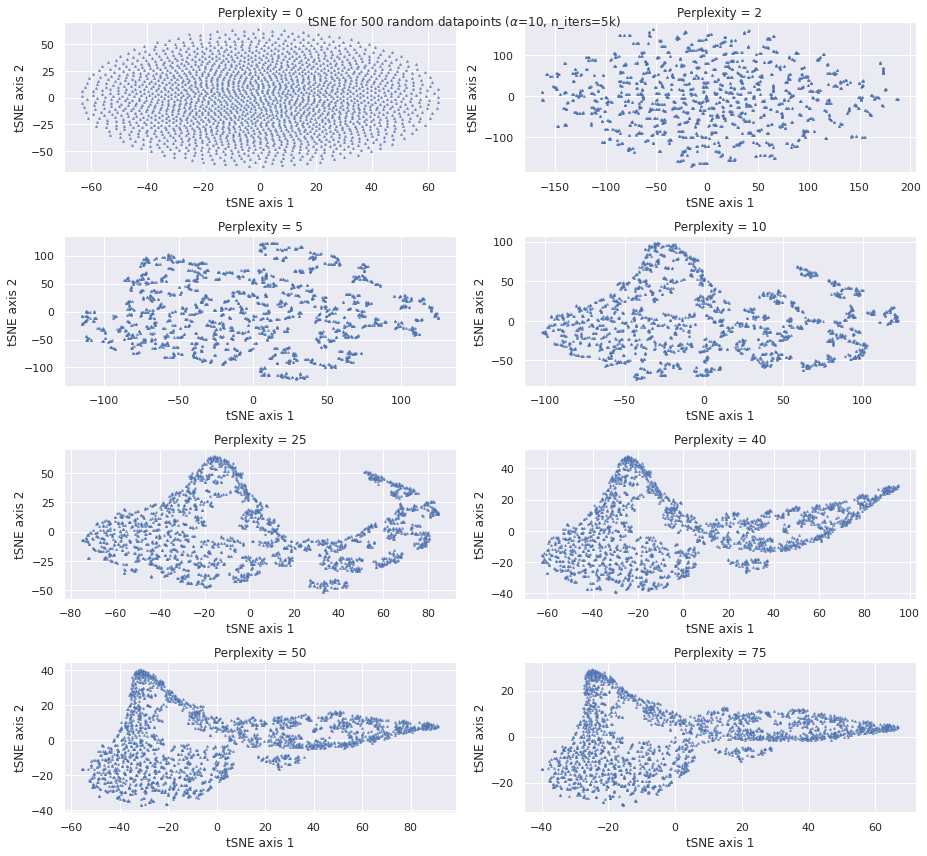

In [72]:
#perplexity = np.arange(0,120,10)
perplexity = [0,2,5,10,25,40,50,75,100]

fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(13,12))

counter = 0
for _,ax in np.ndenumerate(axes):
    model = TSNE(n_components=2,perplexity=perplexity[counter],n_iter=5000,
                 learning_rate=10,random_state=0)
    tsne_data = model.fit_transform(data)
    ax.plot(tsne_data[:,0],tsne_data[:,1], 'b^', markersize=2,alpha=0.6)
    ax.set(xlabel='tSNE axis 1' ,ylabel='tSNE axis 2')
    ax.set_title('Perplexity = {}'.format(perplexity[counter]))
    counter += 1
    
plt.suptitle(r'tSNE for 500 random datapoints ($\alpha$=10, n_iters=5k)',fontsize=20)
plt.tight_layout()
plt.show()

ValueError: ignored

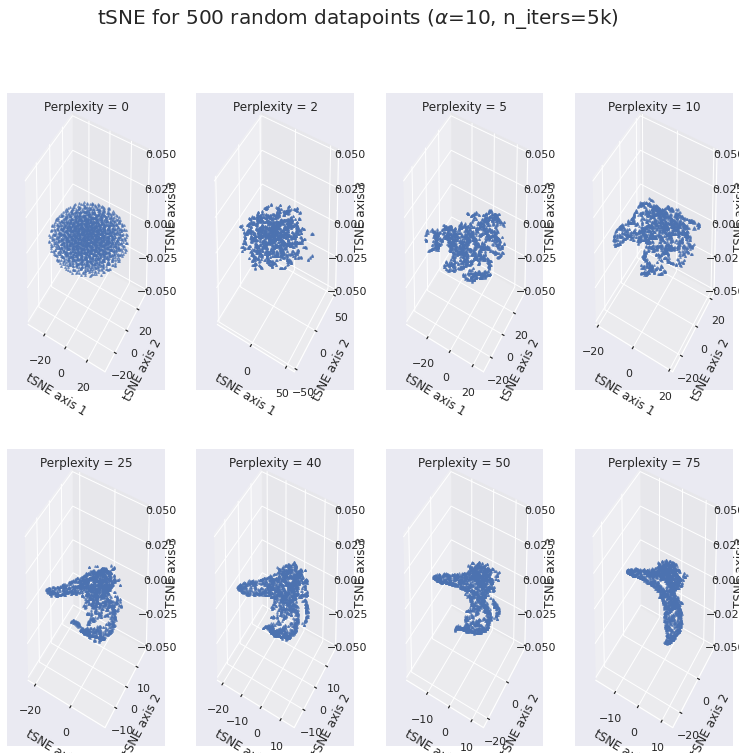

In [73]:
# In 3D 

#perplexity = np.arange(0,120,10)
perplexity = [0,2,5,10,25,40,50,75,100]

fig = plt.figure(figsize=(13, 12))
plt.suptitle(r'tSNE for 500 random datapoints ($\alpha$=10, n_iters=5k)',fontsize=20)

counter = 0
for i in range(len(perplexity)):
    ax = fig.add_subplot(2, 4, i+1, projection='3d')
    model = TSNE(n_components=3,perplexity=perplexity[counter],n_iter=5000,
                 learning_rate=10,random_state=0)
    tsne_data = model.fit_transform(data)
    ax.plot(tsne_data[:,0],tsne_data[:,1], 'b^', markersize=2,alpha=0.6)
    ax.set(xlabel='tSNE axis 1' ,ylabel='tSNE axis 2', zlabel='TSNE axis 3')
    ax.set_title('Perplexity = {}'.format(perplexity[counter]))
    counter += 1
    

plt.tight_layout()
plt.show()